# Insurance Claim Fraud Detection

In [1]:
# To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

# for some basic math, data and plot operations
import numpy as np 
import pandas as pd 
import joypy

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import plotting
from pandas.plotting import parallel_coordinates

# for interactive visualizations
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# for animated visualizations
from bubbly.bubbly import bubbleplot

# for providing path
import os

# for modelling
import sklearn
import imblearn

# for xgboost model builiding
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# for model explanation
import shap 
import eli5

# for best feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
# let's import the data
data = pd.read_csv(r'C:\Users\nikhi\Downloads\insurance_claims.csv')

# let's take a look at the data
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
data.shape

(1000, 40)

In [4]:
# let's take a look at the sample of the data

data.sample(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
360,451,61,533941,1998-06-18,IN,250/500,2000,1618.65,2000000,475407,...,YES,78100,15620,7810,54670,Chevrolet,Tahoe,1997,Y,NaN
246,2,28,184938,1999-05-22,IL,250/500,1000,1340.56,0,433184,...,YES,58140,6460,6460,45220,Saab,92x,2008,N,NaN
872,290,45,219028,1991-07-18,OH,100/300,1000,1311.30,0,451550,...,YES,52650,5850,5850,40950,Ford,F150,2001,Y,NaN
456,78,24,910622,1992-03-22,IN,100/300,500,1175.51,0,474792,...,YES,7480,680,680,6120,Dodge,Neon,2003,N,NaN
659,101,32,223404,2002-01-23,IL,250/500,500,895.14,0,439964,...,YES,43600,8720,4360,30520,Suburu,Legacy,2010,N,NaN


In [5]:
# let's describe the data
# It will demonstrate the count, mean, std dev, min, max, etc values for the Numerical features present in the data.

data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [6]:
# let's get the information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
# Comprhension method
object_data_list = [column  for column in data if data[column].dtypes=='object']

In [8]:
object_data_list

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [9]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [10]:
# let's check whether the data has any null values or not.

# but there are '?' in the datset which we have to remove by NaN Values
data = data.replace('?',np.NaN)

data.isnull().any().any()

True

Dropping the column _c39 as it has all Nan values

In [11]:
data.drop(labels='_c39', axis=1, inplace=True)

In [12]:
# missing value treatment using fillna

# we will replace the '?' by the most common collision type as we are unaware of the type.
data['collision_type'].fillna(data['collision_type'].mode()[0], inplace = True)

# It may be the case that there are no responses for property damage then we might take it as No property damage.
data['property_damage'].fillna('NO', inplace = True)

# again, if there are no responses fpr police report available then we might take it as No report available
data['police_report_available'].fillna('NO', inplace = True)

data.isnull().any().any()

False

### Data Visualizations

In [13]:
fraud = data['fraud_reported'].value_counts()

label_fraud = fraud.index
size_fraud = fraud.values

colors = ['red', 'blue']
trace = go.Pie(
         labels = label_fraud, values = size_fraud, marker = dict(colors = colors), name = 'Frauds', hole = 0.3)


df = [trace]

layout = go.Layout(
           title = 'Distribution of Frauds')

fig = go.Figure(data = df, layout = layout)

py.iplot(fig)

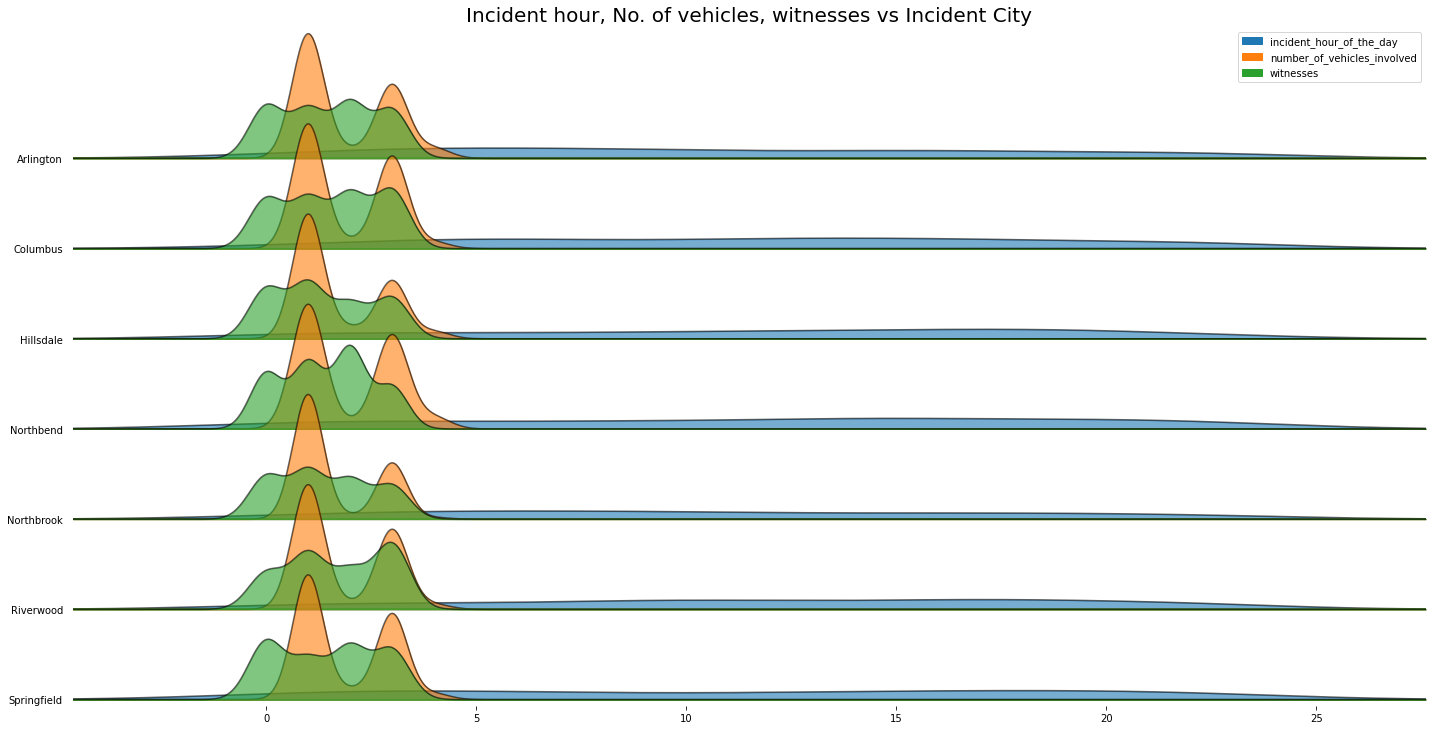

In [14]:
fig, axes = joypy.joyplot(data,
                         column = ['incident_hour_of_the_day','number_of_vehicles_involved', 'witnesses'],
                         by = 'incident_city',
                         ylim = 'own',
                         figsize = (20, 10),
                         alpha = 0.6, 
                         legend = True)

plt.title('Incident hour, No. of vehicles, witnesses vs Incident City', fontsize = 20)
plt.show()


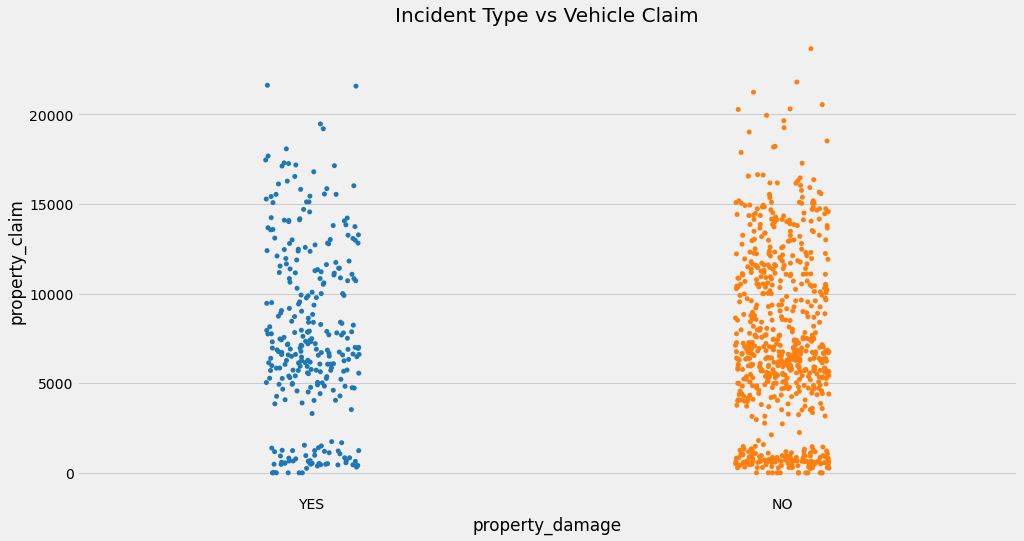

In [15]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.stripplot(data['property_damage'], data['property_claim'], palette = 'tab10')
plt.title('Incident Type vs Vehicle Claim', fontsize = 20)
plt.show()

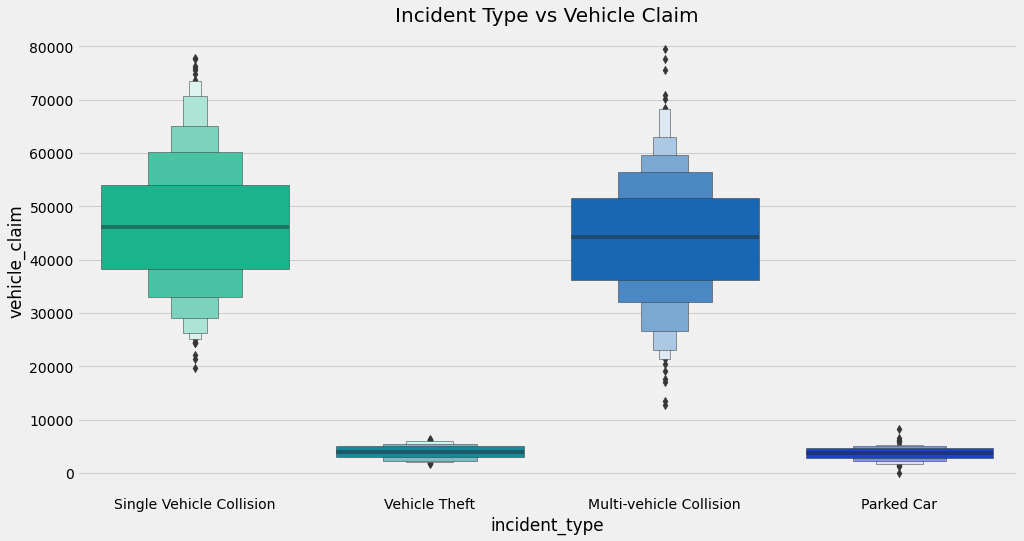

In [16]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.boxenplot(data['incident_type'], data['vehicle_claim'], palette = 'winter_r')
plt.title('Incident Type vs Vehicle Claim', fontsize = 20)
plt.show()

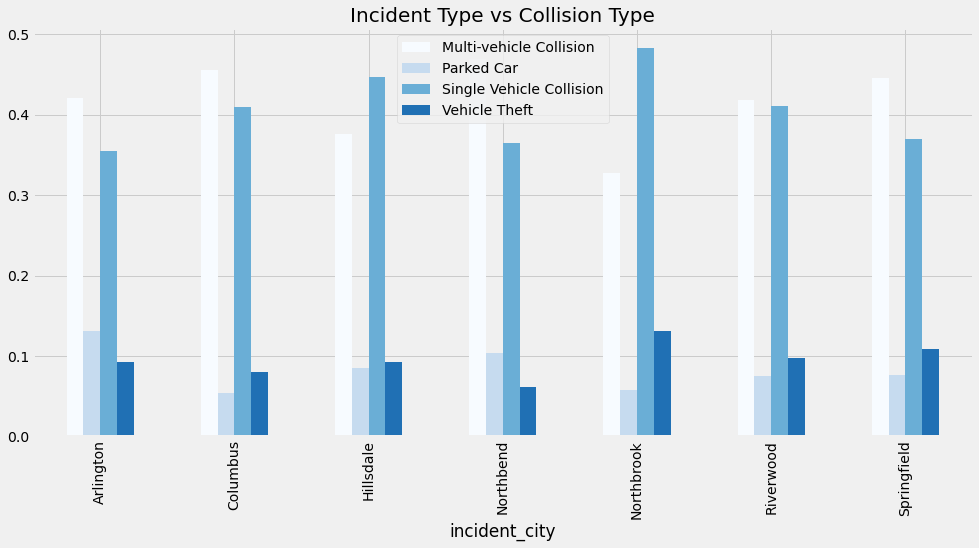

In [17]:
incident = pd.crosstab(data['incident_city'], data['incident_type'])
colors = plt.cm.Blues(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

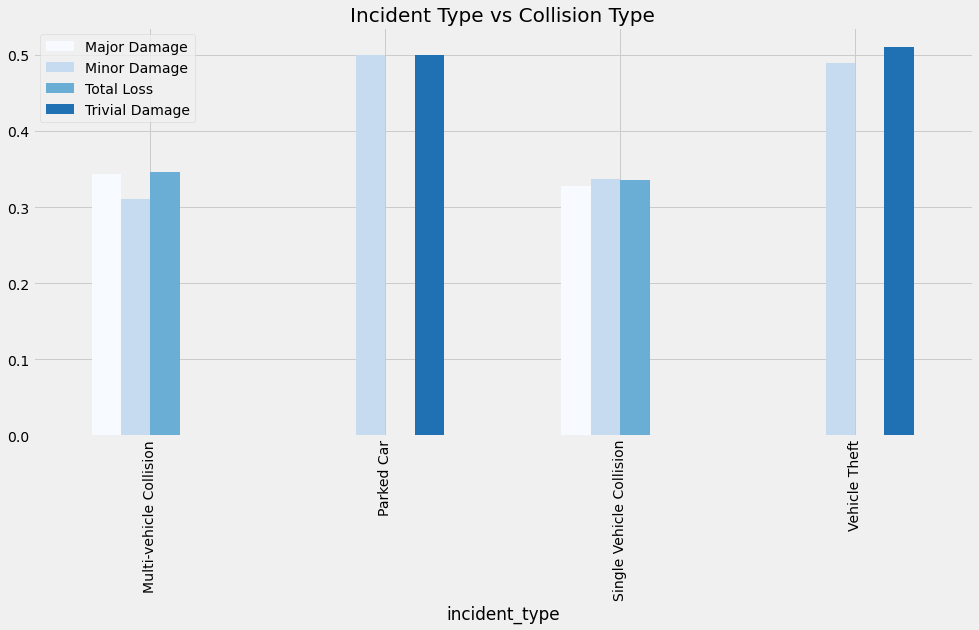

In [18]:
incident = pd.crosstab(data['incident_type'], data['incident_severity'])
colors = plt.cm.Blues(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()


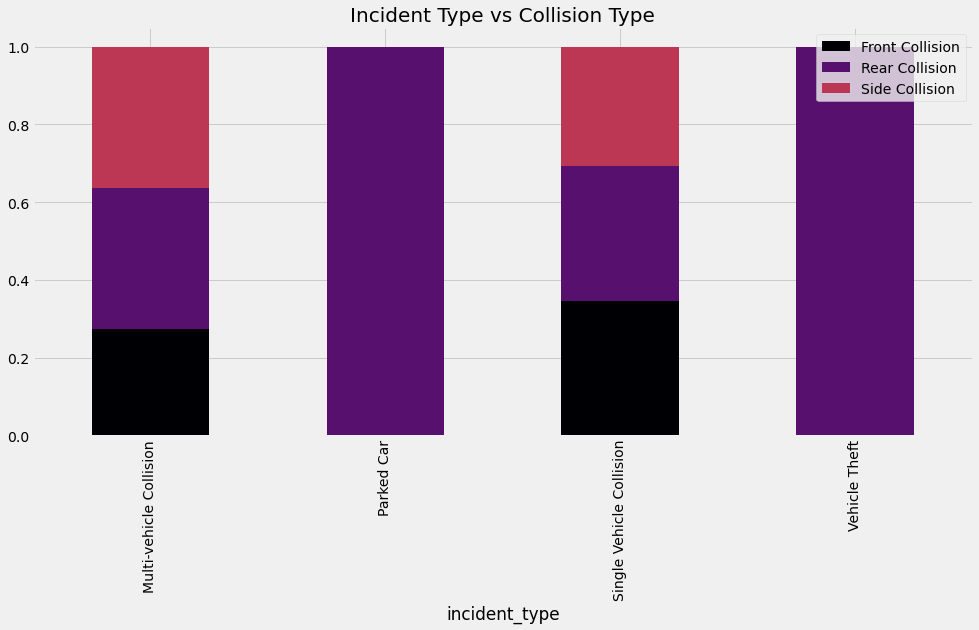

In [19]:
incident = pd.crosstab(data['incident_type'], data['collision_type'])
colors = plt.cm.inferno(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = True,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

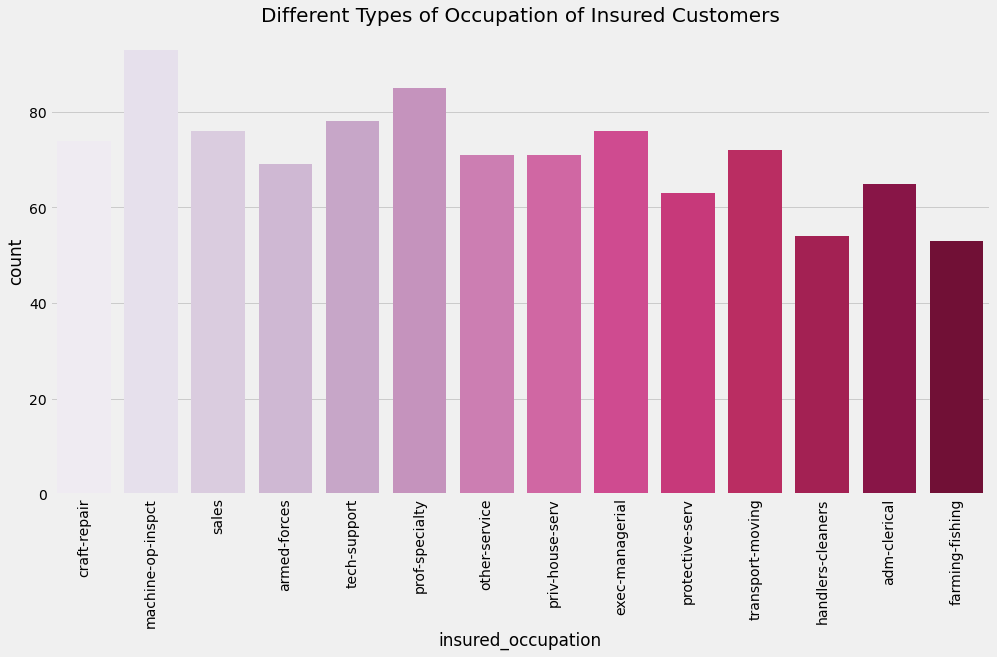

In [20]:
# let's check the insured hobbies

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data['insured_occupation'], palette = 'PuRd')
plt.title('Different Types of Occupation of Insured Customers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

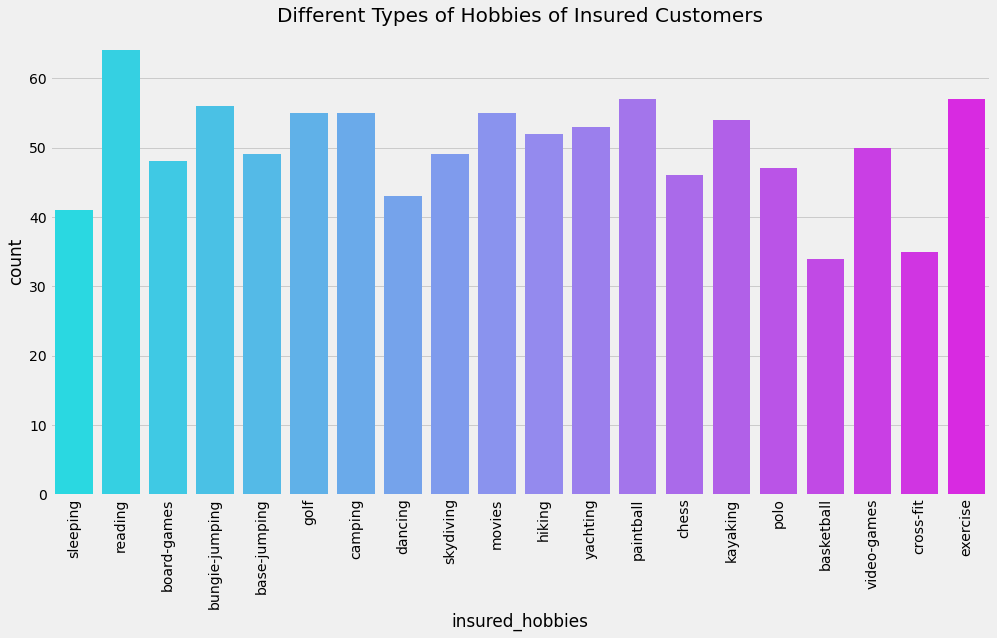

In [21]:
# let's check the insured hobbies

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data['insured_hobbies'], palette = 'cool')
plt.title('Different Types of Hobbies of Insured Customers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show() 

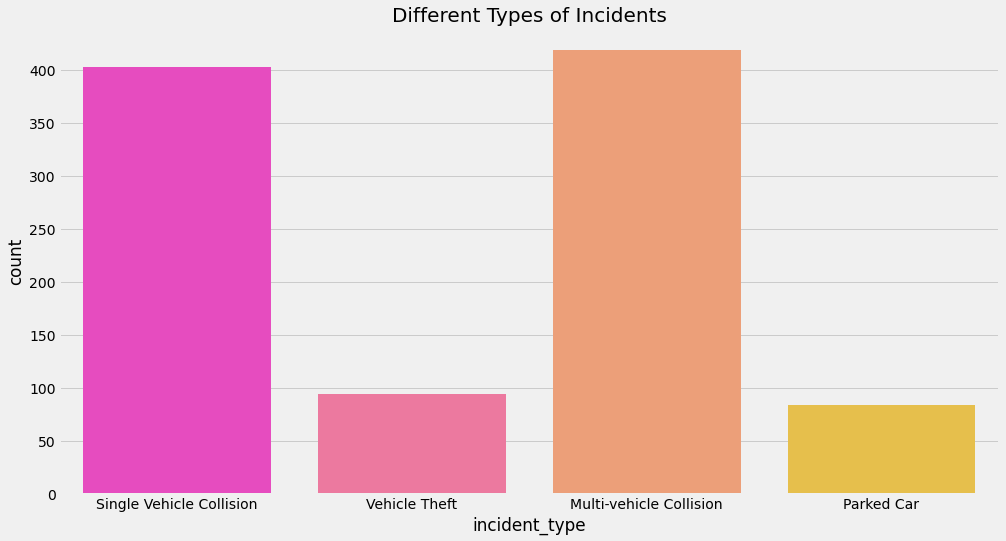

In [22]:
# let's check the incident types

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data['incident_type'], palette = 'spring')
plt.title('Different Types of Incidents', fontsize = 20)
plt.show()

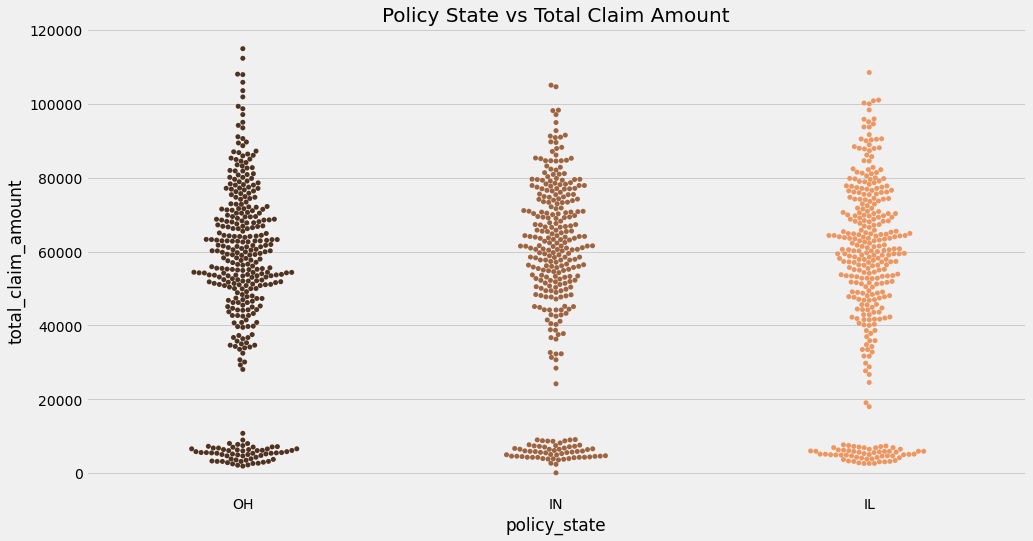

In [23]:
# swarm plot

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.swarmplot(data['policy_state'], data['total_claim_amount'], palette = 'copper')
plt.title('Policy State vs Total Claim Amount', fontsize = 20)
plt.show()

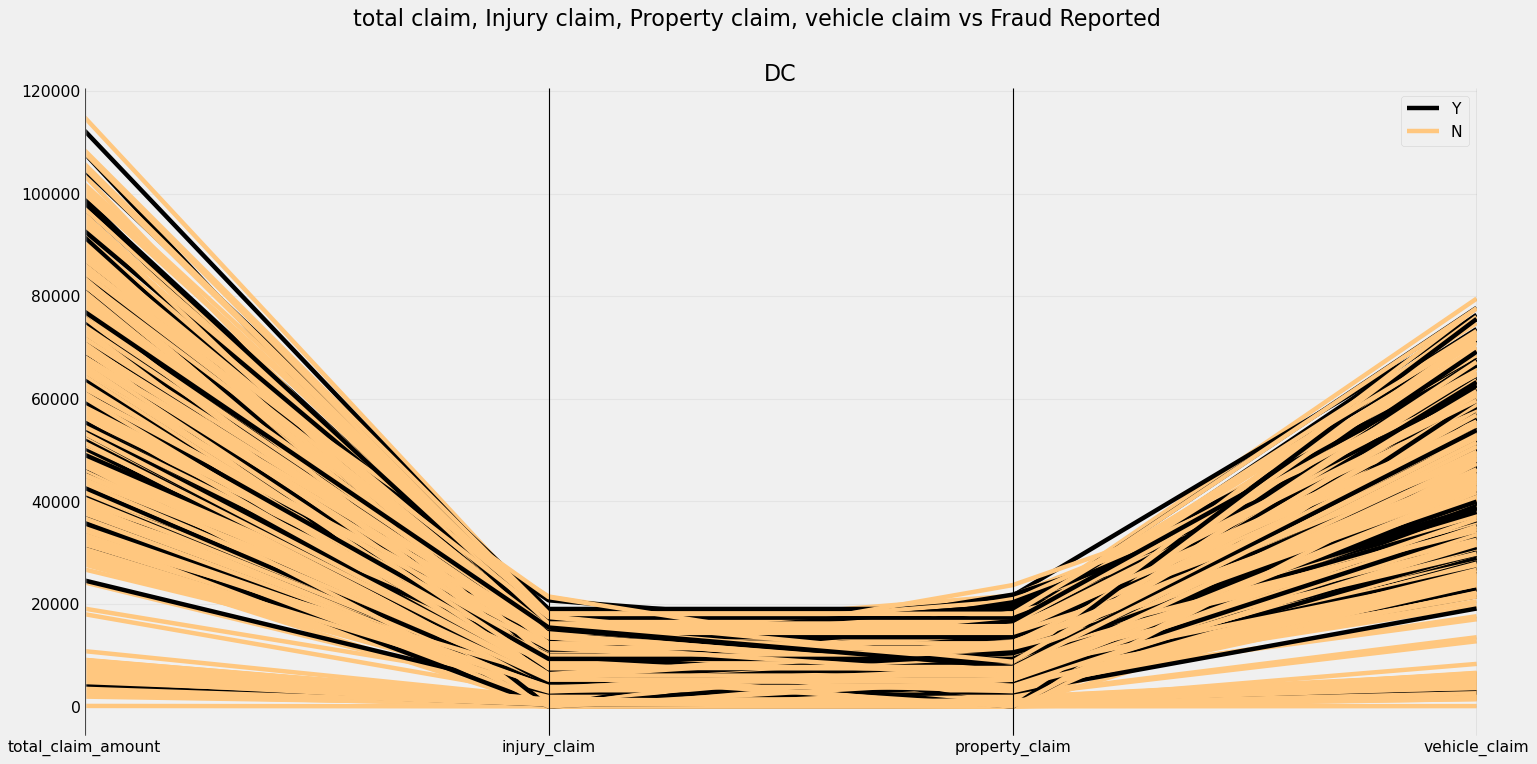

In [24]:
# Plot
plt.figure(figsize=(20, 10), dpi= 80)

parallel_coordinates(data[['total_claim_amount','injury_claim', 'property_claim','vehicle_claim','fraud_reported']],
                     'fraud_reported',  colormap = 'copper')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('DC', fontsize = 20)
plt.grid(alpha=0.3)


plt.suptitle('total claim, Injury claim, Property claim, vehicle claim vs Fraud Reported', fontsize = 20)
plt.show()

In [25]:
import warnings
warnings.filterwarnings('ignore')


figure = bubbleplot(dataset = data, x_column = 'policy_annual_premium', y_column = 'total_claim_amount', 
    bubble_column = 'insured_sex', time_column = 'auto_year', size_column = 'months_as_customer', color_column = 'insured_sex', 
    x_title = "Annual Policy Premium", y_title = "Total Claim Amount", title = 'Annual Premium vs Total Claim Amount vs Months as Customer',
    x_logscale = False, scale_bubble = 3, height = 450)

py.iplot(figure, config={'scrollzoom': True})

In [26]:
trace = go.Histogram(
          x = data['insured_education_level'],
          name = 'Marvel',
          opacity = 0.75,
          marker = dict(
                 color = 'rgb(195, 195, 145, 0.5)'
          )
)
df = [trace]

layout = go.Layout(
    title = 'Education Level of the Customers')

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

In [27]:
trace = go.Histogram(
          x = data['insured_occupation'],
          name = 'Marvel',
          opacity = 0.75,
          marker = dict(
                 color = 'rgb(15, 255, 185, 0.5)'
          )
)
df = [trace]

layout = go.Layout(
    title = 'Occupation of the Customers')

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

In [28]:
sex = data['insured_sex'].value_counts()
rel = data['insured_relationship'].value_counts()

label_sex = sex.index
size_sex = sex.values

label_rel = rel.index
size_rel = rel.values

colors = ['aqua', 'gold']
trace = go.Pie(
         labels = label_sex, values = size_sex, marker = dict(colors = colors), name = 'Gender', hole = 0.3)

colors2 = ['pink', 'lightblue','lightgreen','grey','red']
trace2 = go.Pie(labels = label_rel, values = size_rel, marker = dict(colors = colors2), name = 'Relationship',
                hole = 0.3)

df = [trace]
df2 = [trace2]

layout1 = go.Layout(
           title = 'Gender of the Customers')
layout2 = go.Layout(
           title = 'Relationship')

fig = go.Figure(data = df, layout = layout1)
fig2 = go.Figure(data = df2, layout = layout2)
py.iplot(fig)
py.iplot(fig2)

In [29]:
trace = go.Violin(
          x = data['insured_sex'],
          y = data['insured_zip'],
          name = 'Gender vs Insured Zip',
          opacity = 0.75,
          marker = dict(
                 color = 'rgb(215, 5, 185, 0.5)'
          )
)
df = [trace]

layout = go.Layout(
    title = 'Gender vs Insured Zip')

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

In [30]:
trace = go.Box(
          x = data['auto_make'],
          y = data['vehicle_claim'],
          opacity = 0.7,
          marker = dict(
                 color = 'rgb(215, 195, 5, 0.5)'
          )
)
df = [trace]

layout = go.Layout(
    title = 'Automobile Company vs Vehicle Claim')

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

In [31]:
trace = go.Histogram(
          x = data['age'],
          
          #fill = 'tozeroy',
          marker = dict(
                 color = 'rgb(215, 245, 5, 0.5)'
          )
)
df = [trace]

layout = go.Layout(
    title = 'Distribution of Age among the Customers',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Count')
        ))

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

In [32]:
trace = go.Scatter3d(
    x = data['age'],
    y = data['property_claim'],
    z = data['vehicle_claim'],
    mode = 'markers',
    marker = dict(
         size = 10,
         color = data['age']
    )
)

df = [trace]

layout = go.Layout(
    title = 'Cholestrol vs Heart Rate vs Age',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Property_claim'),
            zaxis = dict(title  = 'Vehicle_claim')
        )
    
)
fig = go.Figure(data = df, layout=layout)
py.iplot(fig)

### Data Preprocessing

In [33]:
# let's extrat days, month and year from policy bind date

data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'], errors = 'coerce')

In [34]:
# let's encode the fraud report to numerical values

data['fraud_reported'] = data['fraud_reported'].replace(('Y','N'),(0,1))

In [35]:
# let's check the correlation of authorities_contacted with the target

data[['auto_model','fraud_reported']].groupby(['auto_model'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,auto_model,fraud_reported
0,3 Series,0.944444
31,RSX,0.916667
25,Malibu,0.900000
36,Wrangler,0.880952
29,Pathfinder,0.870968
35,Ultima,0.869565
9,Camry,0.857143
11,Corolla,0.850000
8,CRV,0.850000
21,Legacy,0.843750


In [36]:
# let's perform target encoding for auto make

data['auto_make'] = data['auto_make'].replace(('3 Series','RSX','Malibu','Wrangler','Pathfinder','Ultima','Camry',
                'Corolla','CRV','Legacy','Neon','95','TL','93','MDX','Accord','Grand Cherokee','Escape','E4000',
            'A3','Highlander','Passat','92x','Jetta','Fusion','Forrestor','Maxima','Impreza','X5','RAM','M5','A5',
                'Civic','F150','Tahaoe','C300','ML350','Silverado','X6'),
                (0.95,0.91, 0.90,0.88,0.87,0.86,0.855,0.85,0.85,0.84,0.83,0.81,0.80,0.80,0.78,0.77,0.76,0.75,0.74,
                 0.73,0.72,0.72,0.71,0.71,0.71,0.71,0.70,0.70,0.69,0.67,0.66,0.65,0.64,0.63,0.62,0.61,0.60,0.59,0.56))

In [37]:
# let's check the correlation auto make with the target

data[['auto_make','fraud_reported']].groupby(['auto_make'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,auto_make,fraud_reported
7,Jeep,0.835821
9,Nissan,0.820513
12,Toyota,0.814286
0,Accura,0.808824
10,Saab,0.775000
11,Suburu,0.762500
4,Dodge,0.750000
6,Honda,0.745455
3,Chevrolet,0.723684
2,BMW,0.722222


In [38]:
# let's perform target encoding for auto make

data['auto_make'] = data['auto_make'].replace(('Jeep','Nissan','Toyota','Accura','Saab','Suburu',
                                'Dodge','Honda','Chevrolet','BMW','Volkswagen','Audi','Ford','Mercedes'),
                                              (0.84,0.82,0.81,0.80,0.77,0.76,0.75,0.74,0.73,0.72,0.71,0.69,0.69,0.66))

In [39]:
# let's check the correlation of authorities_contacted with the target

data[['police_report_available','fraud_reported']].groupby(['police_report_available'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,police_report_available,fraud_reported
1,YES,0.770701
0,NO,0.744898


In [40]:
# let's perform target encoding for property damage

data['police_report_available'] = data['police_report_available'].replace(('NO','YES'),(0.77,0.74))

In [41]:
# let's check the correlation of authorities_contacted with the target

data[['property_damage','fraud_reported']].groupby(['property_damage'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,property_damage,fraud_reported
0,NO,0.757880
1,YES,0.741722


In [42]:
# target encoding for policy_csl

data['property_damage'] = data['property_damage'].replace(('YES','NO'),(0.74,0.75,))

In [43]:
# let's check the correlation of authorities_contacted with the target

data[['incident_city','fraud_reported']].groupby(['incident_city'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_city,fraud_reported
4,Northbrook,0.778689
5,Riverwood,0.776119
3,Northbend,0.765517
6,Springfield,0.757962
2,Hillsdale,0.751773
1,Columbus,0.738255
0,Arlington,0.710526


In [44]:
# let's do target encoding for incident city

data['incident_city'] = data['incident_city'].replace(('Northbrook','Riverwood','Northbend','Springfield',
                                    'Hillsdale','Columbus','Arlington'),(0.78,0.77,0.76,0.75,0.74,0.73,0.71))

In [45]:
# let's check the correlation of authorities_contacted with the target

data[['incident_state','fraud_reported']].groupby(['incident_state'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_state,fraud_reported
6,WV,0.820276
1,NY,0.778626
5,VA,0.772727
3,PA,0.733333
4,SC,0.705645
0,NC,0.690909
2,OH,0.565217


In [46]:
# let's perform target encoding for incident state

data['incident_state'] = data['incident_state'].replace(('WV','NY','VA','PA','SC','NC','OH'),
                                                        (0.82,0.77,0.76,0.73,0.70,0.69,0.56))

In [47]:
# let's check the correlation of incident_severity with the target

data[['incident_severity','fraud_reported']].groupby(['incident_severity'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_severity,fraud_reported
3,Trivial Damage,0.933333
1,Minor Damage,0.892655
2,Total Loss,0.871429
0,Major Damage,0.394928


In [48]:
# let's check the correlation of authorities_contacted with the target

data[['authorities_contacted','fraud_reported']].groupby(['authorities_contacted'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,authorities_contacted,fraud_reported
2,None,0.934066
4,Police,0.791096
1,Fire,0.730942
0,Ambulance,0.709184
3,Other,0.681818


In [49]:
# let's perform target encoding for authorities contacted

data['authorities_contacted'] = data['authorities_contacted'].replace(('None','Police','Fire','Ambulance','Other'),
                                                                      (0.94,0.79,0.73,0.70,0.68))

In [50]:
# let's check the correlation of incident_severity with the target

data[['incident_severity','fraud_reported']].groupby(['incident_severity'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_severity,fraud_reported
3,Trivial Damage,0.933333
1,Minor Damage,0.892655
2,Total Loss,0.871429
0,Major Damage,0.394928


In [51]:
# let's perform target encoding for incident severity

data['incident_severity'] = data['incident_severity'].replace(('Trivial Damage','Minor Damage','Total Loss',
                                                              'Major Damage'),(0.94,0.89,0.87,0.39))

In [52]:
# let's check the correlation of collision_type with the target

data[['collision_type','fraud_reported']].groupby(['collision_type'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,collision_type,fraud_reported
1,Rear Collision,0.772340
2,Side Collision,0.746377
0,Front Collision,0.724409


In [53]:
# let's perform target encoding for collision type

data['collision_type'] = data['collision_type'].replace(('Rear Collision', 'Side Collision', 'Front Collision'),
                                                        (0.78,0.74,0.72))

In [54]:
# let's check the correlation of incident_type with the target

data[['incident_type','fraud_reported']].groupby(['incident_type'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_type,fraud_reported
3,Vehicle Theft,0.914894
1,Parked Car,0.904762
0,Multi-vehicle Collision,0.727924
2,Single Vehicle Collision,0.709677


In [55]:
# let's perform target encoing for incident type

data['incident_type'] = data['incident_type'].replace(('Vehicle Theft','Parked Car','Multi-vehicle Collision',
                                'Single Vehicle Collision'),(0.91, 0.90, 0.72,0.70))


In [56]:
data['incident_date'] = pd.to_datetime(data['incident_date'], errors = 'coerce')

# extracting days and month from date
data['incident_month'] = data['incident_date'].dt.month
data['incident_day'] = data['incident_date'].dt.day

In [57]:
# let's know the relation between insured_relationship and fraud reported

data[['insured_relationship','fraud_reported']].groupby(['insured_relationship'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_relationship,fraud_reported
0,husband,0.794118
3,own-child,0.786885
4,unmarried,0.758865
1,not-in-family,0.741379
5,wife,0.729032
2,other-relative,0.706215


In [58]:
# let's do target encoding for insured relationship

data['insured_relationship'] = data['insured_relationship'].replace(('husband','own-child','unmarried',
                                        'not-in-family','wife','other-relative'),(0.79,0.78,0.75,0.74,0.72,0.70))

In [59]:
# let's know the relation between insured_hobbies and fraud reported

data[['insured_hobbies','fraud_reported']].groupby(['insured_hobbies'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_hobbies,fraud_reported
4,camping,0.909091
11,kayaking,0.907407
9,golf,0.890909
7,dancing,0.883721
3,bungie-jumping,0.839286
12,movies,0.836364
1,basketball,0.823529
8,exercise,0.807018
17,sleeping,0.804878
18,video-games,0.800000


In [60]:
# let's know the relation between insured_occupation and fraud reported

data[['insured_occupation','fraud_reported']].groupby(['insured_occupation'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_occupation,fraud_reported
7,other-service,0.830986
8,priv-house-serv,0.830986
0,adm-clerical,0.830769
5,handlers-cleaners,0.796296
9,prof-specialty,0.788235
10,protective-serv,0.777778
6,machine-op-inspct,0.763441
1,armed-forces,0.753623
11,sales,0.723684
12,tech-support,0.717949


In [61]:
# let's perform target encoding for insured_hobbies

data['insured_hobbies'] = data['insured_hobbies'].replace(('camping', 'kayaking', 'golf','dancing',
        'bungie-jumping','movies', 'basketball','exercise','sleeping','video-games','skydiving','paintball',
            'hiking','base-jumping','reading','polo','board-games','yachting', 'cross-fit','chess'),(0.91, 0.90,
                0.89, 0.88,0.84,0.83,0.82,0.81,0.805,0.80,0.78,0.77,0.76,0.73,0.73,0.72,0.70,0.69,0.25,0.17))


In [62]:
# let's know the relation of insured_education_level with faud_reported

data[['insured_education_level','fraud_reported']].groupby(['insured_education_level'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_education_level,fraud_reported
5,Masters,0.776224
2,High School,0.775000
0,Associate,0.765517
3,JD,0.739130
1,College,0.737705
4,MD,0.736111
6,PhD,0.736000


In [63]:
# let's perform target encoding for insured_occupation

data['insured_occupation'] = data['insured_occupation'].replace(('other-service','priv-house-serv',
                        'adm-clerical','handlers-cleaners','prof-specialty','protective-serv',
                'machine-op-inspct','armed-forces','sales','tech-support','transport-moving','craft-repair',
                    'farming-fishing','exec-managerial'),(0.84, 0.84,0.83, 0.79,0.78,0.77,0.76,0.75,0.72,0.71,
                                                          0.705,0.70,0.69,0.63))

In [64]:
# let's know the relation of insured_education_level with faud_reported

data[['insured_education_level','fraud_reported']].groupby(['insured_education_level'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_education_level,fraud_reported
5,Masters,0.776224
2,High School,0.775000
0,Associate,0.765517
3,JD,0.739130
1,College,0.737705
4,MD,0.736111
6,PhD,0.736000


In [65]:
# let's perform target encoding

data['insured_education_level'] = data['insured_education_level'].replace(('Masters', 'High School','Associate',
                                        'JD','College', 'MD','PhD'),(0.78,0.77,0.76,0.74,0.73,0.72,0.71))

In [66]:
# lets know the relation of insured sex and fraud reported

data[['insured_sex','fraud_reported']].groupby(['insured_sex'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

,insured_sex,fraud_reported
0,FEMALE,0.765363
1,MALE,0.738661


In [67]:
# target encoding for sex

data['insured_sex'] = data['insured_sex'].replace(('FEMALE','MALE'),(0.76,0.73))

### csl - combined single limit

_CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury 
Liability coverage and Property Damage Liability coverage per occurrence or accident._


In [68]:
# lets know the relation of policy state and fraud reported

data[['policy_csl','fraud_reported']].groupby(['policy_csl'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

,policy_csl,fraud_reported
2,500/1000,0.783333
0,100/300,0.742120
1,250/500,0.737892


In [69]:
# target encoding for policy_csl

data['policy_csl'] = data['policy_csl'].replace(('500/1000','100/300','250/500'),(0.78,0.74,0.73))

In [70]:
# lets know the relation of policy state and fraud reported

data[['policy_state','fraud_reported']].groupby(['policy_state'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

,policy_state,fraud_reported
0,IL,0.772189
1,IN,0.745161
2,OH,0.741477


In [71]:
# target encoding for policy_csl

data['policy_state'] = data['policy_state'].replace(('IL','IN','OH'),(0.77,0.745,0.74))

In [72]:
# let's delete unnecassary columns

data = data.drop(['policy_number','policy_bind_date', 'incident_date','incident_location','auto_model'], axis = 1)

# let's check the columns after deleting the columns
data.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year', 'fraud_reported', 'incident_month', 'incident_day'],
      dtype='object')

In [73]:
# let's split the data into dependent and independent sets

x = data.drop(['fraud_reported'], axis = 1)
y = data['fraud_reported']

print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (1000, 35)
Shape of y : (1000,)


In [74]:
x.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,incident_month,incident_day
0,328,48,0.740,0.73,1000,1406.91,0,466132,0.73,0.72,...,2,0.74,71610,6510,13020,52080,0.77,2004,1,25
1,228,42,0.745,0.73,2000,1197.22,5000000,468176,0.73,0.72,...,0,0.77,5070,780,780,3510,0.66,2007,1,21
2,134,29,0.740,0.74,2000,1413.14,5000000,430632,0.76,0.71,...,3,0.77,34650,7700,3850,23100,0.75,2007,2,22
3,256,41,0.770,0.73,2000,1415.74,6000000,608117,0.76,0.71,...,2,0.77,63400,6340,6340,50720,0.73,2014,1,10
4,228,44,0.770,0.78,1000,1583.91,6000000,610706,0.73,0.76,...,1,0.77,6500,1300,650,4550,0.80,2009,2,17


In [75]:
# let's split the dataset into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (800, 35)
Shape of x_test : (200, 35)
Shape of y_train : (800,)
Shape of y_test : (200,)


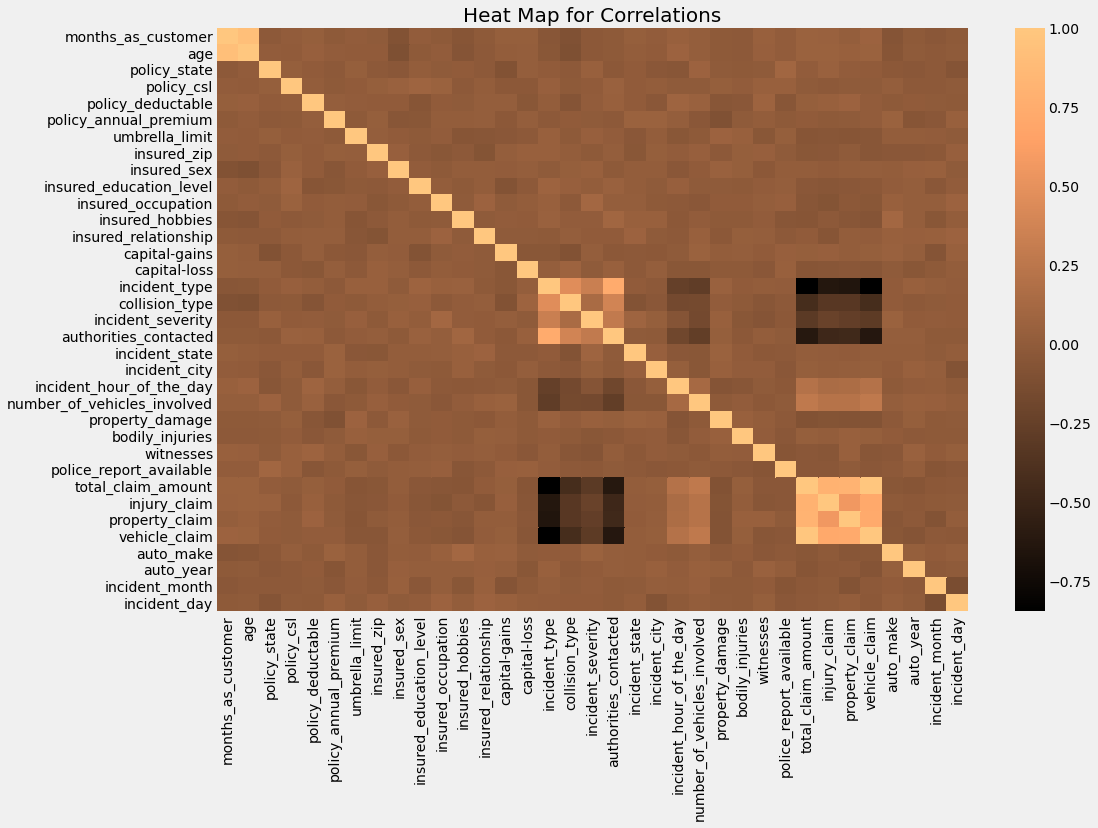

In [76]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(x_train.corr(), cmap = 'copper')
plt.title('Heat Map for Correlations', fontsize = 20)
plt.show()

In [77]:
# Using the ANOVA Test to check the best features
from sklearn.feature_selection import f_classif 

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns
print("These are the best 10 features of our data")
print(featureScores.nlargest(10,'Score'))  # print 10 best features

These are the best 10 features of our data
                    Specs       Score
17      incident_severity  358.358888
11        insured_hobbies  193.273851
15          incident_type   29.943513
30          vehicle_claim   29.718214
27     total_claim_amount   27.463776
18  authorities_contacted   26.932356
29         property_claim   19.327729
10     insured_occupation   17.820572
19         incident_state   16.269371
31              auto_make   13.839461


In [79]:
#import plotly.express as px
#fig = px.scatter_3d(x_pca, x=x_pca[:, 0], y=x_pca[:, 1], z=x_pca[:, 2],
#              color=x_pca[:, 0])
#fig.show()

#### Created the dataframe for using at streamlit to avoid the increase in app size 
data.to_csv(r"C:/Downloads/nikhil/User/Insurance_claims_clean_data.csv")

# XGBoost

In [94]:
# let's split the data into dependent and independent sets

x = data[['incident_severity','insured_hobbies', 'incident_type', 'vehicle_claim', 'total_claim_amount', 'authorities_contacted', 
            'property_claim', 'insured_occupation', 'incident_state', 'auto_make']]
y = data['fraud_reported']

print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (1000, 10)
Shape of y : (1000,)


In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (800, 10)
Shape of x_test : (200, 10)
Shape of y_train : (800,)
Shape of y_test : (200,)


In [83]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=7)

# fit model no training data
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.09403	validation_0-logloss:0.51969	validation_1-error:0.16970	validation_1-logloss:0.54984
[1]	validation_0-error:0.08358	validation_0-logloss:0.41907	validation_1-error:0.16970	validation_1-logloss:0.47407
[2]	validation_0-error:0.07463	validation_0-logloss:0.35479	validation_1-error:0.18182	validation_1-logloss:0.43426
[3]	validation_0-error:0.07164	validation_0-logloss:0.31070	validation_1-error:0.16970	validation_1-logloss:0.41008
[4]	validation_0-error:0.05970	validation_0-logloss:0.27537	validation_1-error:0.17273	validation_1-logloss:0.38878
[5]	validation_0-error:0.05970	validation_0-logloss:0.24877	validation_1-error:0.17576	validation_1-logloss:0.38535
[6]	validation_0-error:0.05522	validation_0-logloss:0.22652	validation_1-error:0.17879	validation_1-logloss:0.38251
[7]	validation_0-error:0.05373	validation_0-logloss:0.20977	validation_1-error:0.17879	validation_1-logloss:0.38229
[8]	validation_0-error:0.04925	validation_0-logloss:0.19604	validation_1

[71]	validation_0-error:0.00000	validation_0-logloss:0.03042	validation_1-error:0.18485	validation_1-logloss:0.51621
[72]	validation_0-error:0.00000	validation_0-logloss:0.03009	validation_1-error:0.18485	validation_1-logloss:0.51834
[73]	validation_0-error:0.00000	validation_0-logloss:0.02965	validation_1-error:0.19091	validation_1-logloss:0.52167
[74]	validation_0-error:0.00000	validation_0-logloss:0.02935	validation_1-error:0.18788	validation_1-logloss:0.52381
[75]	validation_0-error:0.00000	validation_0-logloss:0.02905	validation_1-error:0.19091	validation_1-logloss:0.52613
[76]	validation_0-error:0.00000	validation_0-logloss:0.02863	validation_1-error:0.18788	validation_1-logloss:0.52760
[77]	validation_0-error:0.00000	validation_0-logloss:0.02811	validation_1-error:0.19091	validation_1-logloss:0.52890
[78]	validation_0-error:0.00000	validation_0-logloss:0.02786	validation_1-error:0.18788	validation_1-logloss:0.53264
[79]	validation_0-error:0.00000	validation_0-logloss:0.02750	val

In [84]:
# We can retrieve the performance of the model on the evaluation dataset 
# and plot it to get insight into how learning unfolded while training.

val_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)


[0]	validation_0-error:0.09403	validation_1-error:0.16970
[1]	validation_0-error:0.08358	validation_1-error:0.16970
[2]	validation_0-error:0.07463	validation_1-error:0.18182
[3]	validation_0-error:0.07164	validation_1-error:0.16970
[4]	validation_0-error:0.05970	validation_1-error:0.17273
[5]	validation_0-error:0.05970	validation_1-error:0.17576
[6]	validation_0-error:0.05522	validation_1-error:0.17879
[7]	validation_0-error:0.05373	validation_1-error:0.17879
[8]	validation_0-error:0.04925	validation_1-error:0.17576
[9]	validation_0-error:0.04328	validation_1-error:0.16667
[10]	validation_0-error:0.03881	validation_1-error:0.16667
[11]	validation_0-error:0.03284	validation_1-error:0.16970
[12]	validation_0-error:0.03134	validation_1-error:0.17879
[13]	validation_0-error:0.02985	validation_1-error:0.18182
[14]	validation_0-error:0.02836	validation_1-error:0.18182
[15]	validation_0-error:0.02687	validation_1-error:0.18182
[16]	validation_0-error:0.02388	validation_1-error:0.17879
[17]	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [85]:
# This returns a dictionary of evaluation datasets and scores, for example:

results = model.evals_result()
print(results)


{'validation_0': OrderedDict([('error', [0.09403, 0.083582, 0.074627, 0.071642, 0.059701, 0.059701, 0.055224, 0.053731, 0.049254, 0.043284, 0.038806, 0.032836, 0.031343, 0.029851, 0.028358, 0.026866, 0.023881, 0.022388, 0.022388, 0.020896, 0.019403, 0.019403, 0.01791, 0.016418, 0.01194, 0.01194, 0.007463, 0.008955, 0.008955, 0.00597, 0.004478, 0.004478, 0.002985, 0.002985, 0.002985, 0.002985, 0.002985, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])]), 'validation_1': OrderedDict([('error', [0.169697, 0.169697, 0.181818, 0.169697, 0.172727, 0.175758, 0.178788, 0.178788, 0.175758, 0.166667, 0.166667, 0.169697, 0.178788, 0.181818, 0.181818, 0.181818, 0.178788, 0.178788, 0.175758, 0.178788, 0.172727, 0.172727, 0.172727, 0.175

In [86]:
# A specific array of results, such as for the first dataset and 
# the error metric can be accessed as follows:

results['validation_0']['error']

[0.09403,
 0.083582,
 0.074627,
 0.071642,
 0.059701,
 0.059701,
 0.055224,
 0.053731,
 0.049254,
 0.043284,
 0.038806,
 0.032836,
 0.031343,
 0.029851,
 0.028358,
 0.026866,
 0.023881,
 0.022388,
 0.022388,
 0.020896,
 0.019403,
 0.019403,
 0.01791,
 0.016418,
 0.01194,
 0.01194,
 0.007463,
 0.008955,
 0.008955,
 0.00597,
 0.004478,
 0.004478,
 0.002985,
 0.002985,
 0.002985,
 0.002985,
 0.002985,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

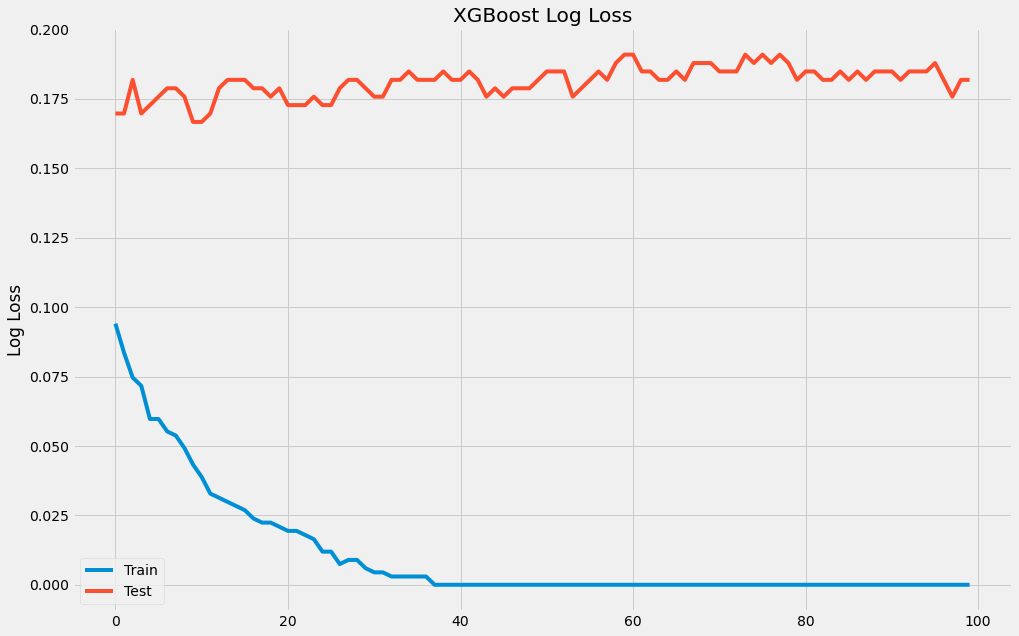

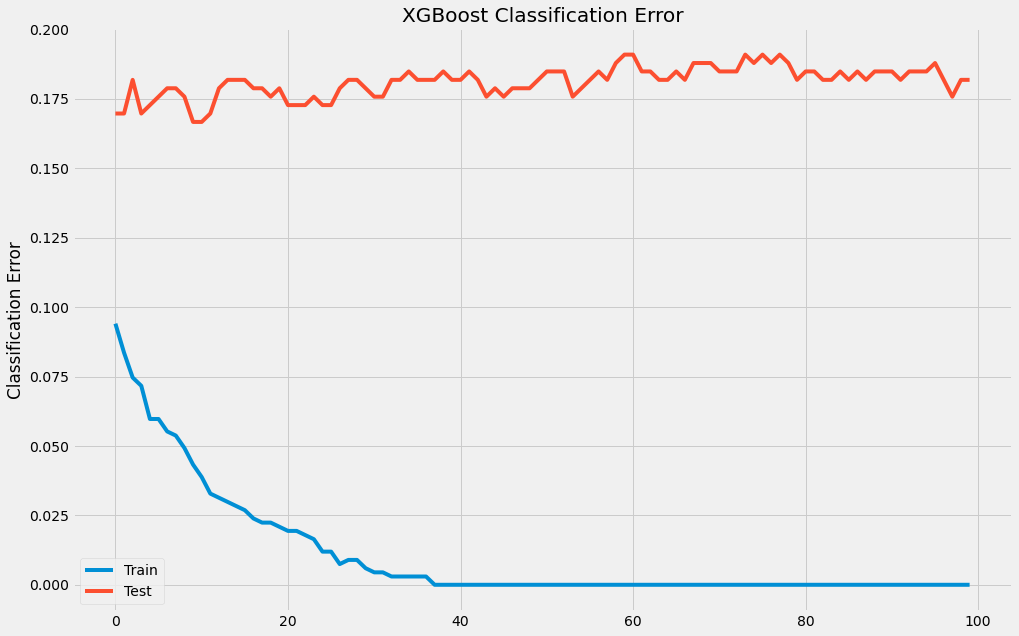

In [87]:
from matplotlib import pyplot

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

Here in XGBoost I'm having the overfitting problem to solve that I have used the early stop method

In [88]:
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.54984
[1]	validation_0-logloss:0.47407
[2]	validation_0-logloss:0.43426
[3]	validation_0-logloss:0.41008
[4]	validation_0-logloss:0.38878
[5]	validation_0-logloss:0.38535
[6]	validation_0-logloss:0.38251
[7]	validation_0-logloss:0.38229
[8]	validation_0-logloss:0.38007
[9]	validation_0-logloss:0.38240
[10]	validation_0-logloss:0.38629
[11]	validation_0-logloss:0.38573
[12]	validation_0-logloss:0.39470
[13]	validation_0-logloss:0.39536
[14]	validation_0-logloss:0.40101
[15]	validation_0-logloss:0.40196
[16]	validation_0-logloss:0.40595
[17]	validation_0-logloss:0.41324
Accuracy: 82.42%


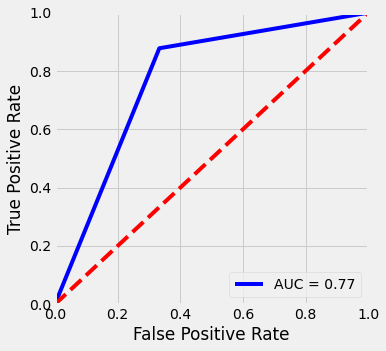

In [90]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)


# method I: plt
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest Classifier

In [93]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(800, 10)
(670,)
(200, 10)
(330,)


In [96]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier(n_estimators=5)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
#print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.975
Testing Accuracy : 0.78
[[ 26  31]
 [ 13 130]]


Here we can see that the model is overfitted so I'm using the optimization method (Optuna)

#### Used OPtuna optimization method for the better model building of the Random Forest Model

In [97]:
import optuna
import sklearn

def objective(trial):
      n_estimators = trial.suggest_int('n_estimators', 2, 18)
      max_depth = int(trial.suggest_loguniform('max_depth', 1, 21))
      clf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
      return sklearn.model_selection.cross_val_score(clf, x_train, y_train, 
           n_jobs=-1, cv=3).mean()

In [98]:
# The objective function value is evaluated using a study object.

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2022-01-29 14:17:31,040] A new study created in memory with name: no-name-953494b0-ffbf-4c89-9237-30746b88f628
[I 2022-01-29 14:17:37,326] Trial 0 finished with value: 0.8362760834670947 and parameters: {'n_estimators': 2, 'max_depth': 3.3449876468555906}. Best is trial 0 with value: 0.8362760834670947.
[I 2022-01-29 14:17:40,957] Trial 1 finished with value: 0.7625008213417438 and parameters: {'n_estimators': 17, 'max_depth': 1.083707548907078}. Best is trial 0 with value: 0.8362760834670947.
[I 2022-01-29 14:17:44,297] Trial 2 finished with value: 0.7637492607924306 and parameters: {'n_estimators': 5, 'max_depth': 1.0387752926806504}. Best is trial 0 with value: 0.8362760834670947.
[I 2022-01-29 14:17:44,381] Trial 3 finished with value: 0.8287338195676458 and parameters: {'n_estimators': 6, 'max_depth': 20.354391650142563}. Best is trial 0 with value: 0.8362760834670947.
[I 2022-01-29 14:17:44,469] Trial 4 finished with value: 0.776243042062084 and parameters: {'n_estimators': 13

[I 2022-01-29 14:17:48,262] Trial 39 finished with value: 0.847507345141881 and parameters: {'n_estimators': 12, 'max_depth': 20.52162936238036}. Best is trial 24 with value: 0.8500089174246477.
[I 2022-01-29 14:17:48,382] Trial 40 finished with value: 0.826241634047666 and parameters: {'n_estimators': 12, 'max_depth': 20.692664587790574}. Best is trial 24 with value: 0.8500089174246477.
[I 2022-01-29 14:17:48,494] Trial 41 finished with value: 0.8274806867355654 and parameters: {'n_estimators': 12, 'max_depth': 16.79603033320031}. Best is trial 24 with value: 0.8500089174246477.
[I 2022-01-29 14:17:48,590] Trial 42 finished with value: 0.8237588352904733 and parameters: {'n_estimators': 10, 'max_depth': 9.323757158373738}. Best is trial 24 with value: 0.8500089174246477.
[I 2022-01-29 14:17:48,670] Trial 43 finished with value: 0.8300057259253002 and parameters: {'n_estimators': 10, 'max_depth': 11.717244413388132}. Best is trial 24 with value: 0.8500089174246477.
[I 2022-01-29 14:17:

[I 2022-01-29 14:17:52,141] Trial 79 finished with value: 0.8362666967043076 and parameters: {'n_estimators': 14, 'max_depth': 4.974656661927001}. Best is trial 24 with value: 0.8500089174246477.
[I 2022-01-29 14:17:52,261] Trial 80 finished with value: 0.8300151126880873 and parameters: {'n_estimators': 13, 'max_depth': 8.478611049872056}. Best is trial 24 with value: 0.8500089174246477.
[I 2022-01-29 14:17:52,349] Trial 81 finished with value: 0.8362854702298819 and parameters: {'n_estimators': 6, 'max_depth': 18.98660747821159}. Best is trial 24 with value: 0.8500089174246477.
[I 2022-01-29 14:17:52,453] Trial 82 finished with value: 0.8362479231787333 and parameters: {'n_estimators': 11, 'max_depth': 7.045842774454653}. Best is trial 24 with value: 0.8500089174246477.
[I 2022-01-29 14:17:52,557] Trial 83 finished with value: 0.8312306984690191 and parameters: {'n_estimators': 12, 'max_depth': 7.922180246917349}. Best is trial 24 with value: 0.8500089174246477.
[I 2022-01-29 14:17:5

In [99]:
# Checking the best trials
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.8562745815850489
Best hyperparameters: {'n_estimators': 11, 'max_depth': 6.784849319362492}


In [100]:
# optimization history plot

optuna.visualization.plot_optimization_history(study)

In [101]:
# optimization slice plot

optuna.visualization.plot_slice(study)

# Naive Bayes

In [102]:
'''
The following code is for XGBoost
Created by - Hanmant Shankar Rotte


Create the object of the Naive Bayes model
'''

from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predict1 = gnb.predict(x_test)
print(accuracy_score(y_test,predict1))


0.755


# SVM 

In [103]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  
y_pred=classifier.predict(x_test)
from sklearn.metrics import accuracy_score, r2_score
print(accuracy_score(y_pred,y_test))

0.855


# Stochastic Gradient Descent Classifier 

In [104]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [105]:
clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(x_train, y_train)

# Pipeline(steps=[('standardscaler', StandardScaler()),('sgdclassifier', SGDClassifier())])
y_pred2 = clf.predict(x_test)
from sklearn.metrics import accuracy_score, r2_score
print(accuracy_score(y_pred2,y_test))

0.78


# Checking the best model accuracy as follows

In [125]:
rfc = RandomForestClassifier()
knn =  KNeighborsClassifier()
xgb = XGBClassifier()
sgd = SGDClassifier()
svm = SVC()  

from sklearn.model_selection import cross_val_score
clf = [rfc,knn,sgd,svm,xgb]
algorithm = []
accuracy = []
for algo in clf:
    score = cross_val_score(algo,x_train,y_train,cv = 5,scoring = 'accuracy')
    print("The accuracy score of {} is:".format(algo),score.mean())
    algorithm.append(algo)
    accuracy.append(score.mean())
    
from sklearn.ensemble import StackingClassifier
lr = LogisticRegression()
stack_model = StackingClassifier( estimators = clf,final_estimator = lr)
score = cross_val_score(stack_model,x_train,y_train,cv = 5,scoring = 'accuracy')
print("The accuracy score of is:",score.mean())

The accuracy score of RandomForestClassifier() is: 0.8412499999999999
The accuracy score of KNeighborsClassifier() is: 0.8424999999999999
The accuracy score of SGDClassifier() is: 0.82875
The accuracy score of SVC() is: 0.8625
[14:40:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation m

In [127]:
accuracy_data = pd.DataFrame()
accuracy_data['Algorithm'] = algorithm
accuracy_data['Accuracy'] = accuracy

In [129]:
accuracy_data

,Algorithm,Accuracy
0,RandomForestClassifier(),0.84125
1,KNeighborsClassifier(),0.84250
2,SGDClassifier(),0.82875
3,SVC(),0.86250
4,"XGBClassifier(base_score=None, booster=None, c...",0.83000
